In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings

warnings.filterwarnings("ignore")

# Set operations to 3 decimal places
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,Gender,Age,Marital status,household size,What is your highest Level of education?,Do you speak/ understand english,Is farming your primary occupation?,What is your farm Size in acres?,How long have you been in vegetable farming? (years),Are you the Owner of the Farm?,...,Difficulty in understanding digital content,High service cost,Lack of government support,Difficulty in finding services tailored to solve specific problems,Network/Infrastructural challenges,Lack of adequate information about digital technology services and benefits,Limited trust in digital agricultural service providers,Limited flexibility in payment plan for digital technology service packages,Limited after sale support for farmers on the efficient use of digital technology services,Difficulty in integrating digital technology service data with existing systems
0,Male,48,Single,1,No formal education,No,Yes,5,8.000,Yes,...,2,7,12,1,5,3,8,6,11,10
1,Male,42,Married,7,Middle/JSS/JHS,Yes,No,2,10.000,Yes,...,1,7,4,8,9,6,10,11,2,12
2,Male,25,Married,5,SHS,Yes,No,1,5.000,No,...,2,7,5,9,8,10,3,6,12,11
3,Male,37,Married,5,Primary,Yes,No,2,10.000,Yes,...,1,6,4,8,7,9,3,11,10,12
4,Male,46,Married,3,Primary,Yes,Yes,10,15.000,Yes,...,2,4,5,8,6,7,9,10,11,12


In [3]:
df = data.copy()
df.shape

(395, 89)

In [4]:
# Display the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 89 columns):
 #   Column                                                                                                                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                         --------------  -----  
 0   Gender                                                                                                                                                                                                                                                         395 non-null    object 
 1   Age                                   

In [5]:
# Display the summary statistics of the data
df.describe()

,Age,household size,What is your farm Size in acres?,How long have you been in vegetable farming? (years),How many visits do you receive from the extension officer in a month?,How much do you earn from farming in a year?,Radio,Television,Extension agent,Fellow Farmer,...,Difficulty in understanding digital content,High service cost,Lack of government support,Difficulty in finding services tailored to solve specific problems,Network/Infrastructural challenges,Lack of adequate information about digital technology services and benefits,Limited trust in digital agricultural service providers,Limited flexibility in payment plan for digital technology service packages,Limited after sale support for farmers on the efficient use of digital technology services,Difficulty in integrating digital technology service data with existing systems
count,395.000,395.000,395.000,394.000,100.000,395.000,251.000,251.000,251.000,251.000,...,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000
mean,44.754,4.681,1.884,12.234,1.100,7225.549,0.287,0.363,0.279,0.618,...,4.509,8.238,7.772,5.010,6.446,3.775,8.008,8.453,7.357,6.635
std,11.197,2.402,1.433,9.374,0.302,4511.332,0.453,0.482,0.449,0.487,...,3.779,2.733,3.226,2.540,2.891,2.864,2.394,2.868,2.961,3.411
min,23.000,1.000,1.000,1.000,1.000,1000.000,0.000,0.000,0.000,0.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,2.000,1.000
25%,36.500,3.000,1.000,5.000,1.000,5450.000,0.000,0.000,0.000,0.000,...,2.000,6.000,5.000,3.000,4.000,1.000,7.000,7.000,5.000,4.000
50%,45.000,4.000,2.000,9.500,1.000,7000.000,0.000,0.000,0.000,1.000,...,2.000,9.000,8.000,5.000,6.000,3.000,8.000,9.000,8.000,7.000
75%,52.000,6.000,2.000,17.000,1.000,8400.000,1.000,1.000,1.000,1.000,...,7.000,11.000,11.000,7.000,9.000,6.000,10.000,11.000,10.000,10.000
max,71.000,11.000,10.000,45.000,2.000,62600.000,1.000,1.000,1.000,1.000,...,12.000,12.000,12.000,12.000,12.000,12.000,12.000,12.000,12.000,12.000


In [6]:
# Check for missing data
def check_missing_data(df):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    missing_data = missing_data.sort_values(ascending=False)
    missing_data = missing_data.to_frame()
    missing_data.columns = ["Missing Values"]
    return missing_data


check_missing_data(df)

,Missing Values
"A company offers a comprehensive digital technology service tailored to your agricultural needs.The company provides essential market information, real-time weather updates, facilitates supply chain linkages crucial for optimizing your production and…",395
Which of the following digital technology services do you know about? (Tick all you know about),395
Constraints,395
"Rank the following constraints in order of severity from 1 to 12, where 1 is the most constraint and 12 is the least pressing constraint",395
"If yes, is your access to financial assistance an important factor in your decision to pay for digital technology services in your production and marketing activities?",310
"if other, indicate....",305
How_long_have_you_been_on_the_platform_,299
"If yes, Which platform or Service are you registered on?",299
How many visits do you receive from the extension officer in a month?,295
"If no,would you pay GHC 10 a month for such services?",292


### Objective 1: Identify key digital technology services


In [7]:
# List of digital technology services
services = [
    "weather_update services",
    "inputs_seed_fertilizer_agrochemicals-yes or no",
    "market_linkage_platforms",
    "mobile_based_training_services",
    "market_prices_updates_services",
    "Crop_insurance_services",
    "Digital_finance_services_platforms",
    "Pest_and_disease_management_services",
    "Farm_management_platforms_and_tools",
    "Information_and_advisory_services",
    "Supply_chain_management_platforms",
]

df[services].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   weather_update services                         395 non-null    object
 1   inputs_seed_fertilizer_agrochemicals-yes or no  395 non-null    object
 2   market_linkage_platforms                        395 non-null    object
 3   mobile_based_training_services                  395 non-null    object
 4   market_prices_updates_services                  395 non-null    object
 5   Crop_insurance_services                         395 non-null    object
 6   Digital_finance_services_platforms              395 non-null    object
 7   Pest_and_disease_management_services            395 non-null    object
 8   Farm_management_platforms_and_tools             395 non-null    object
 9   Information_and_advisory_services               395 no

In [8]:
df[services].describe()

,weather_update services,inputs_seed_fertilizer_agrochemicals-yes or no,market_linkage_platforms,mobile_based_training_services,market_prices_updates_services,Crop_insurance_services,Digital_finance_services_platforms,Pest_and_disease_management_services,Farm_management_platforms_and_tools,Information_and_advisory_services,Supply_chain_management_platforms
count,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,2,2,2,2,2,2
top,yes,no,no,no,no,no,yes,no,no,yes,no
freq,313,340,274,243,302,315,279,309,334,263,322


In [9]:
df[services].head(10)

,weather_update services,inputs_seed_fertilizer_agrochemicals-yes or no,market_linkage_platforms,mobile_based_training_services,market_prices_updates_services,Crop_insurance_services,Digital_finance_services_platforms,Pest_and_disease_management_services,Farm_management_platforms_and_tools,Information_and_advisory_services,Supply_chain_management_platforms
0,no,no,no,no,no,no,no,no,no,no,no
1,yes,no,no,yes,yes,yes,yes,no,no,yes,no
2,yes,no,no,no,no,yes,yes,yes,yes,yes,no
3,yes,no,yes,yes,yes,yes,yes,no,yes,yes,yes
4,yes,no,no,no,no,no,no,no,no,no,no
5,no,no,no,no,no,no,yes,no,no,yes,no
6,yes,no,no,yes,no,no,yes,no,no,yes,no
7,yes,no,yes,yes,no,no,yes,yes,no,yes,no
8,no,no,no,no,no,no,no,no,no,no,no
9,yes,no,no,yes,no,no,yes,yes,no,yes,no


In [10]:
# convert yes and no to 1 and 0
df[services] = df[services].replace({"yes": 1, "no": 0})
df[services].head(10)

,weather_update services,inputs_seed_fertilizer_agrochemicals-yes or no,market_linkage_platforms,mobile_based_training_services,market_prices_updates_services,Crop_insurance_services,Digital_finance_services_platforms,Pest_and_disease_management_services,Farm_management_platforms_and_tools,Information_and_advisory_services,Supply_chain_management_platforms
0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,1,0,0,1,0
2,1,0,0,0,0,1,1,1,1,1,0
3,1,0,1,1,1,1,1,0,1,1,1
4,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,1,0
6,1,0,0,1,0,0,1,0,0,1,0
7,1,0,1,1,0,0,1,1,0,1,0
8,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,1,0,0,1,1,0,1,0


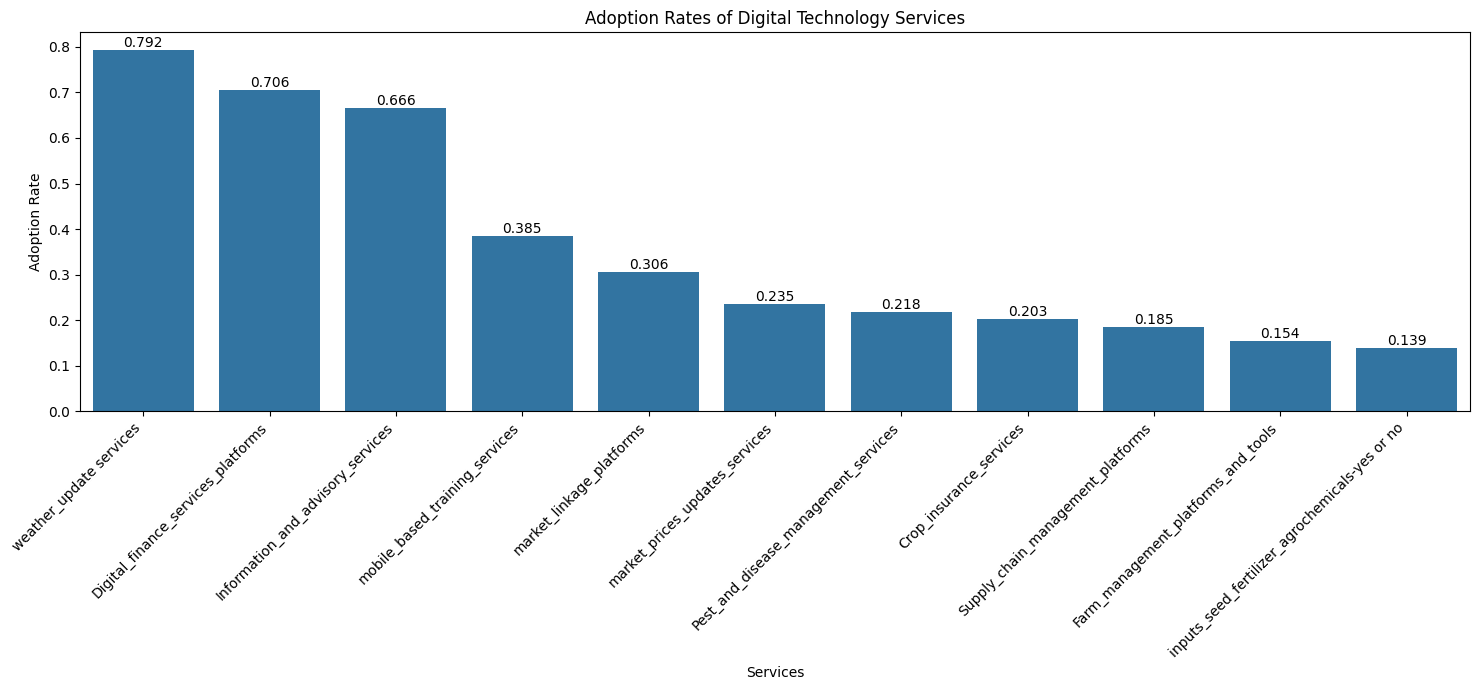

In [11]:
# Calculate adoption rates
adoption_rates = df[services].mean().sort_values(ascending=False)

# Visualize adoption rates
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=adoption_rates.index, y=adoption_rates.values, ax=ax)
for container in ax.patches:
    ax.annotate(
        f"{container.get_height():.3f}",
        (container.get_x() + container.get_width() / 2, container.get_height()),
        ha="center",
        va="bottom",
    )
plt.title("Adoption Rates of Digital Technology Services")
plt.xlabel("Services")
plt.ylabel("Adoption Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Objective 2: Examine factors influencing willingness to pay

---


In [12]:
"How much do you earn from farming in a year?" in df.columns

True

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Prepare features and target variable
features = [
    "Age",
    "household size",
    "What is your farm Size in acres?",
    "How long have you been in vegetable farming? (years)",
    "How much do you earn from farming in a year?",
    "Would you be willing to pay for such services?",
]

features_df = df[features]

# Check for missing values in features
check_missing_data(features_df)

,Missing Values
How long have you been in vegetable farming? (years),1


In [14]:
# Drop rows with missing values
features_df = features_df.dropna()

In [15]:
features_df.shape

(394, 6)

In [16]:
X = features_df.drop("Would you be willing to pay for such services?", axis=1)
y = features_df["Would you be willing to pay for such services?"]

In [17]:
# verify shape of X and y
print(f"X shape: {X.shape}\ny shape: {y.shape}")

X shape: (394, 5)
y shape: (394,)


In [18]:
X.head(10)

,Age,household size,What is your farm Size in acres?,How long have you been in vegetable farming? (years),How much do you earn from farming in a year?
0,48,1,5,8.000,15000
1,42,7,2,10.000,2400
2,25,5,1,5.000,3000
3,37,5,2,10.000,2800
4,46,3,10,15.000,5000
5,51,2,10,10.000,9000
6,39,4,1,4.000,3000
7,29,1,2,5.000,7000
8,63,5,3,20.000,6500
9,32,3,1,1.000,3000


In [19]:
y.head(10)

0    Yes
1    Yes
2    Yes
3    Yes
4     No
5     No
6     No
7    Yes
8     No
9    Yes
Name: Would you be willing to pay for such services?, dtype: object

In [20]:
# # Encode the target variable
y = y.replace({"Yes": 1, "No": 0})

In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Print coefficients
for feature, coef in zip(features, model.coef_[0]):
    print(f"{feature}: {coef:.3f}")

Age: -0.481
household size: 0.236
What is your farm Size in acres?: -0.515
How long have you been in vegetable farming? (years): -0.309
How much do you earn from farming in a year?: 0.172


### Objective 3: Estimate impact of farm size on willingness to pay

---


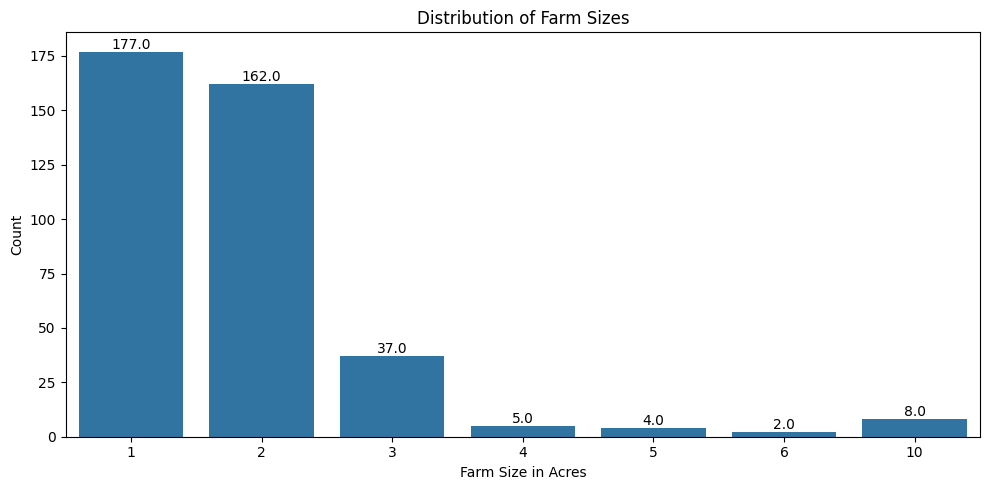

In [22]:
value_counts = df["What is your farm Size in acres?"].value_counts()

# Visualize the distribution of farm sizes
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
for container in ax.patches:
    ax.annotate(
        f"{container.get_height()}",
        (container.get_x() + container.get_width() / 2, container.get_height()),
        ha="center",
        va="bottom",
    )
plt.title("Distribution of Farm Sizes")
plt.xlabel("Farm Size in Acres")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [23]:
farm_size_groups = (
    df["What is your farm Size in acres?"].value_counts().sort_index(ascending=True)
)
farm_size_groups

What is your farm Size in acres?
1     177
2     162
3      37
4       5
5       4
6       2
10      8
Name: count, dtype: int64

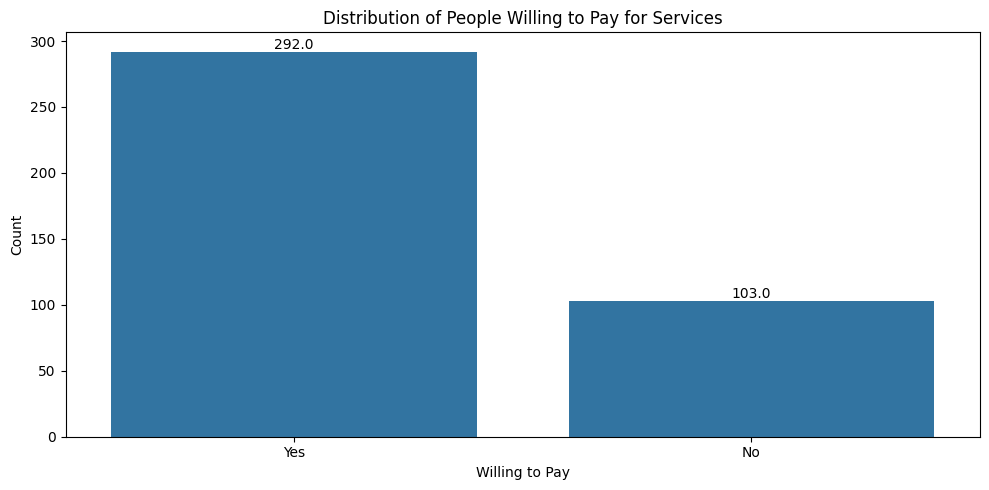

In [24]:
# Check and visualize the distribution of people willing to pay for services
will_count = df["Would you be willing to pay for such services?"].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=will_count.index, y=will_count.values, ax=ax)
for container in ax.patches:
    ax.annotate(
        f"{container.get_height()}",
        (container.get_x() + container.get_width() / 2, container.get_height()),
        ha="center",
        va="bottom",
    )
plt.title("Distribution of People Willing to Pay for Services")
plt.xlabel("Willing to Pay")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [25]:
# Encode the willing to pay variable with Yes as 1 and No as 0
df["Would you be willing to pay for such services?"] = df[
    "Would you be willing to pay for such services?"
].replace({"Yes": 1, "No": 0})

In [26]:
table = pd.pivot_table(
    df,
    values="Would you be willing to pay for such services?",
    index="What is your farm Size in acres?",
    aggfunc=np.mean,
)

table

,Would you be willing to pay for such services?
What is your farm Size in acres?,
1,0.802
2,0.722
3,0.730
4,0.600
5,0.750
6,0.000
10,0.000


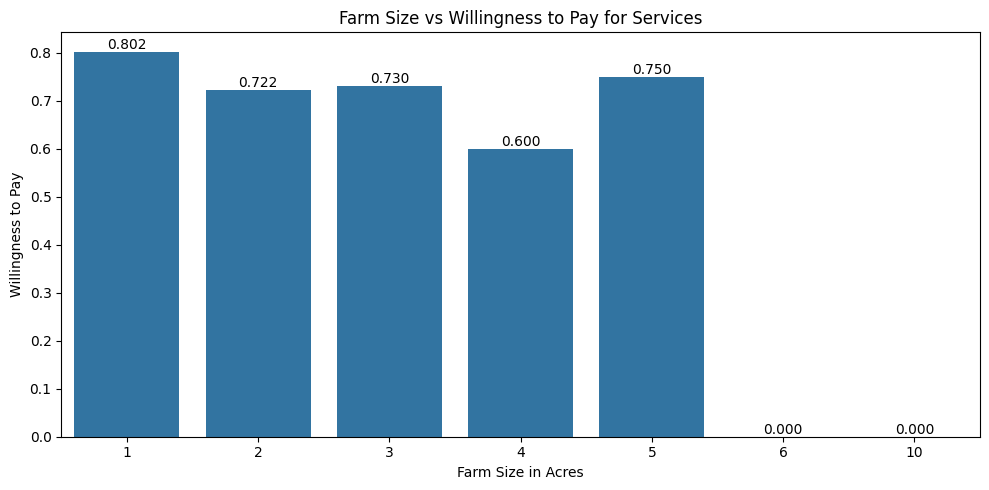

In [27]:
# plot the pivot table
fig, ax = plt.subplots(figsize=(10, 5))
# sns.barplot(x=table.index, y=table.values, ax=ax)
sns.barplot(x=table.index, y=table.values.flatten(), ax=ax)

for container in ax.patches:
    ax.annotate(
        f"{container.get_height():.3f}",
        (container.get_x() + container.get_width() / 2, container.get_height()),
        ha="center",
        va="bottom",
    )
plt.title("Farm Size vs Willingness to Pay for Services")
plt.xlabel("Farm Size in Acres")
plt.ylabel("Willingness to Pay")
plt.tight_layout()
plt.show()

### Farm Sizes and Willingness to Pay:

1. **1 Acre**: The willingness to pay is the highest at 0.802.
2. **2 Acres**: The willingness to pay is slightly lower at 0.722.
3. **3 Acres**: The willingness to pay is 0.730, which is slightly higher than for 2 acres.
4. **4 Acres**: The willingness to pay is around 0.600.
5. **6 Acres**: The willingness to pay is exactly 0.600.
6. **10 Acres**: The willingness to pay is 0.750.

### Key Observations:

- **Higher Willingness for Smaller Farms**: Smaller farms (1-3 acres) show a higher willingness to pay for services, with the highest being for 1-acre farms.
- **Lower Willingness for Medium Farms**: Farms of 4 and 6 acres show a lower willingness to pay, around 0.600.
- **Slight Increase for Larger Farms**: The willingness to pay increases again for 10-acre farms, reaching 0.750.

### Conclusion:

The graph suggests that smaller farms are more willing to pay for services compared to medium-sized farms, with a slight increase in willingness for the largest farms in the dataset. This pattern could indicate that smaller farms see more value in the services offered, while medium-sized farms might be less inclined, possibly due to different needs or financial constraints.


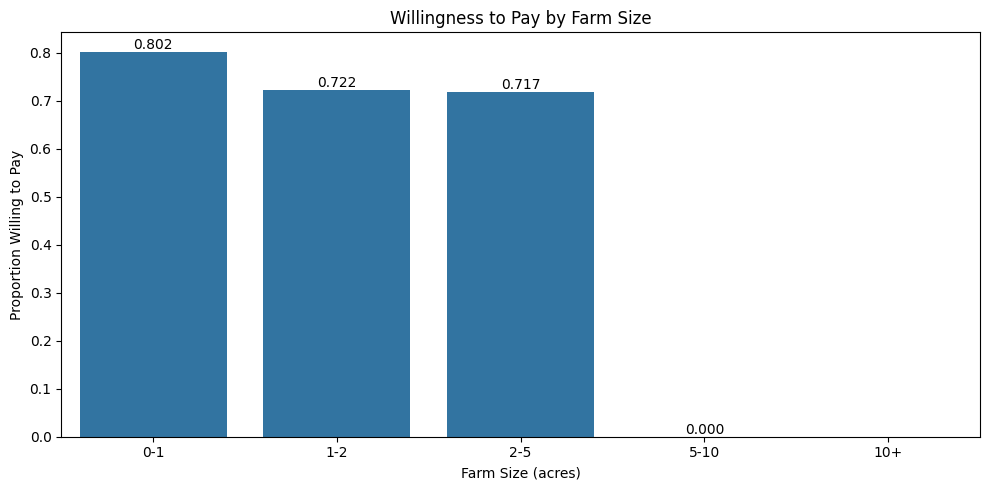

Chi-square statistic: 32.35349854225024
p-value: 4.408367664836358e-07


In [28]:
# Group data by farm size and calculate average willingness to pay
from scipy import stats


farm_size_groups = pd.cut(
    df["What is your farm Size in acres?"],
    bins=[0, 1, 2, 5, 10, float("inf")],
    labels=["0-1", "1-2", "2-5", "5-10", "10+"],
)
willingness_by_size = df.groupby(farm_size_groups)[
    "Would you be willing to pay for such services?"
].mean()

# Visualize the relationship
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=willingness_by_size.index, y=willingness_by_size.values, ax=ax)
for container in ax.patches:
    ax.annotate(
        f"{container.get_height():.3f}",
        (container.get_x() + container.get_width() / 2, container.get_height()),
        ha="center",
        va="bottom",
    )
plt.title("Willingness to Pay by Farm Size")
plt.xlabel("Farm Size (acres)")
plt.ylabel("Proportion Willing to Pay")
plt.tight_layout()
plt.show()


# Perform a statistical test (e.g., chi-square test of independence)
contingency_table = pd.crosstab(
    farm_size_groups, df["Would you be willing to pay for such services?"]
)
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

- **Chi-square statistic**: 32.353
- **p-value**: 4.408e-07

### Interpretation:

1. **Chi-square Statistic**: The chi-square statistic of 32.353 indicates the magnitude of the difference between the observed and expected frequencies in your contingency table. A higher chi-square value suggests a greater difference between the observed and expected data.

2. **p-value**: The p-value of 4.408e-07 (which is 0.0000004408) is extremely small, much smaller than the common significance level of 0.05.

### Conclusion:

- **Reject the Null Hypothesis**: Since the p-value is significantly less than 0.05, you reject the null hypothesis. This means there is a statistically significant association between farm size and willingness to pay for the services.

- **Significant Association**: The results suggest that the willingness to pay for the services is not independent of farm size. In other words, farm size has a significant impact on whether individuals are willing to pay for the services.


### Objective 4: Analyze constraints to employing digital technology services


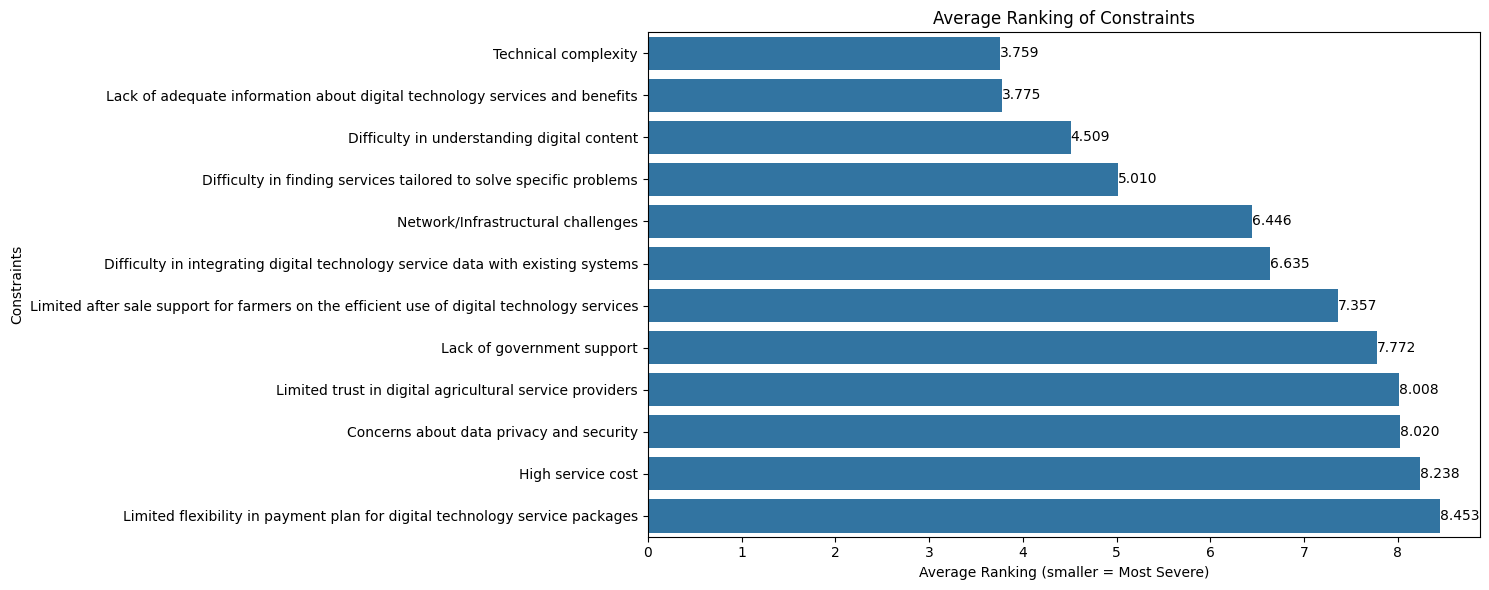

In [29]:
# List of constraints
constraints = [
    "Technical complexity",
    "Concerns about data privacy and security",
    "Difficulty in understanding digital content",
    "High service cost",
    "Lack of government support",
    "Difficulty in finding services tailored to solve specific problems",
    "Network/Infrastructural challenges",
    "Lack of adequate information about digital technology services and benefits",
    "Limited trust in digital agricultural service providers",
    "Limited flexibility in payment plan for digital technology service packages",
    "Limited after sale support for farmers on the efficient use of digital technology services",
    "Difficulty in integrating digital technology service data with existing systems",
]

# Calculate average ranking for each constraint
avg_rankings = df[constraints].mean().sort_values()

# Visualize the average rankings
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=avg_rankings.values, y=avg_rankings.index, ax=ax)
for container in ax.patches:
    ax.annotate(
        f"{container.get_width():.3f}",
        (container.get_width(), container.get_y() + container.get_height() / 2),
        ha="left",
        va="center",
    )
plt.title("Average Ranking of Constraints")
plt.xlabel("Average Ranking (smaller = Most Severe)")
plt.ylabel("Constraints")
plt.tight_layout()
plt.show()

The bar graph titled "Average Ranking of Constraints" shows the average ranking of various constraints that might limit or hinder progress, with rankings ranging from 1 to 7 (1 being the most severe constraint).

### Constraints and Their Rankings:

1. **Lack of adequate information about digital technology services and benefits**: Average ranking of 3.775.
2. **Technical complexity**: Average ranking of 3.759.
3. **Difficulty in finding relevant/tailored digital content**: Average ranking of 4.509.
4. **Network/infrastructure challenges**: Average ranking of 6.446.
5. **Difficulty in understanding how to solve specific problems**: Average ranking of 5.010.
6. **Limited trust in digital government services**: Average ranking of 8.008.
7. **Lack of local or community support**: Average ranking of 7.772.
8. **Concerns about data privacy and security**: Average ranking of 8.020.
9. **Limited flexibility in payment plan for digital technology service packages**: Average ranking of 8.453.

### Key Observations:

- **Most Severe Constraints**: The top constraints are "Lack of adequate information about digital technology services and benefits" and "Technical complexity," both with average rankings around 3.7.
- **Moderate Constraints**: "Difficulty in finding relevant/tailored digital content" and "Difficulty in understanding how to solve specific problems" have moderate rankings, indicating they are significant but not the most severe constraints.
- **Least Severe Constraints**: "Limited trust in digital government services," "Concerns about data privacy and security," and "Limited flexibility in payment plan for digital technology service packages" have the highest average rankings, indicating they are perceived as less severe constraints.

### Conclusion:

The graph highlights that the most critical constraints are related to information availability and technical complexity, while issues like trust, privacy, and payment flexibility are considered less severe. This insight can help prioritize areas for improvement to better support users in adopting digital technology services.


### Constraints with reverse rankings

---


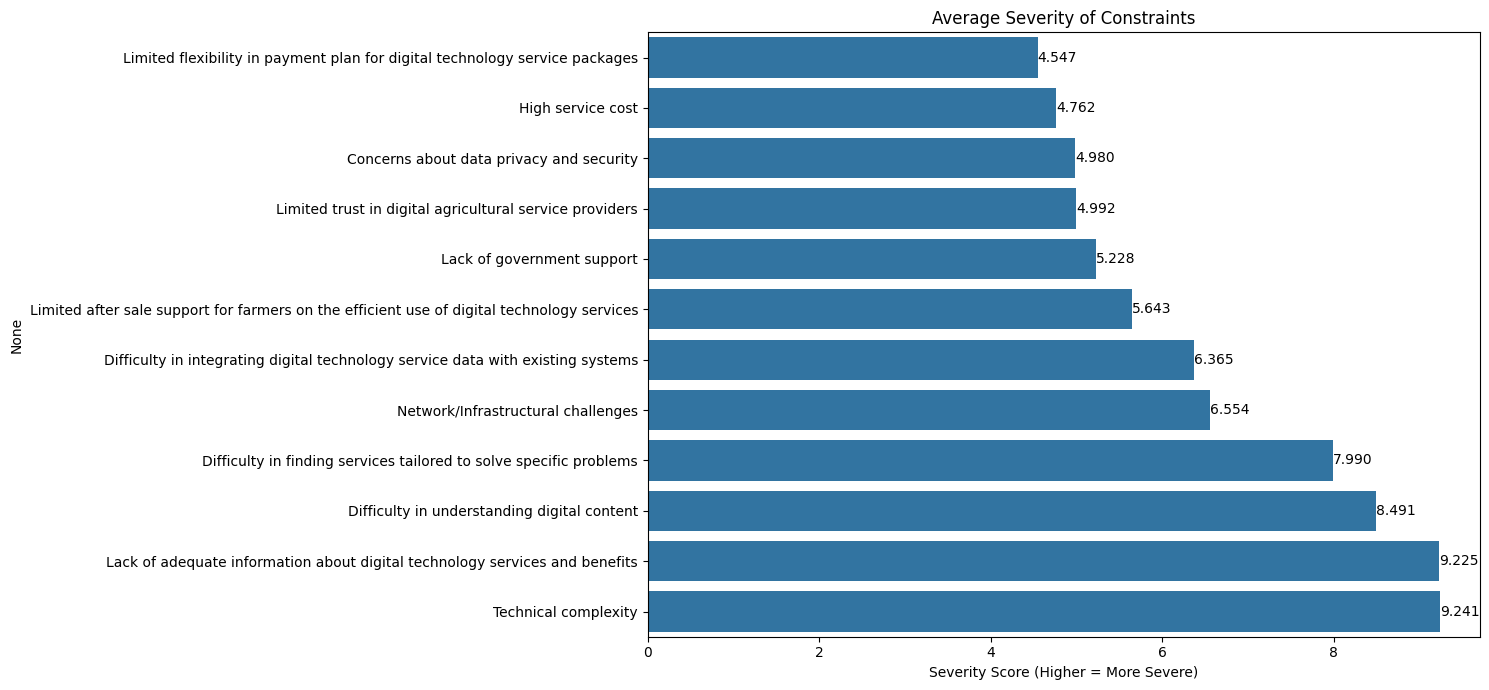

In [30]:
# Calculate average ranking for each constraint
avg_rankings = df[constraints].mean().sort_values(ascending=False)

# Reverse the scale so that higher values indicate more severe constraints
severity_scores = 13 - avg_rankings

# Visualize average rankings
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=severity_scores.values, y=severity_scores.index, ax=ax)
for container in ax.patches:
    ax.annotate(
        f"{container.get_width():.3f}",
        (container.get_width(), container.get_y() + container.get_height() / 2),
        ha="left",
        va="center",
    )
plt.title("Average Severity of Constraints")
plt.xlabel("Severity Score (Higher = More Severe)")
plt.tight_layout()
plt.show()

## Further Analysis
---

## Probit Tobit Heckman Selection

In [31]:
import numpy as np
import pandas as pd
from statsmodels.discrete.discrete_model import Probit
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant


def tobit_model(X, y, lower_bound=0):
    # Tobit model implementation
    probit_model = Probit(y > lower_bound, X).fit()
    ols_model = OLS(y[y > lower_bound], X[y > lower_bound]).fit()

    return probit_model, ols_model


def cragg_double_hurdle(X, y):
    # Cragg's double hurdle model
    participation = (y > 0).astype(int)
    probit_model = Probit(participation, X).fit()

    truncated_reg = OLS(y[y > 0], X[y > 0]).fit()

    return probit_model, truncated_reg


def heckman_selection(X, y, z):
    # Heckman selection model
    selection = (y > 0).astype(int)
    selection_model = Probit(selection, z).fit()

    inverse_mills_ratio = selection_model.predict(z) / (1 - selection_model.predict(z))
    X_with_mills = add_constant(np.column_stack((X[y > 0], inverse_mills_ratio[y > 0])))

    outcome_model = OLS(y[y > 0], X_with_mills).fit()

    return selection_model, outcome_model

In [33]:
# Group columns for willingness to pay
willingness_cols = [
    "Would you be willing to pay for such services?",
    "If yes,would you pay GHC 13 a month for such services?",
    "If no,would you pay GHC 10 a month for such services?",
    "Considering the benefits the services come with, would you pay GHC 15 a month for it?",
]

check_missing_data(df[willingness_cols])



,Missing Values
"If no,would you pay GHC 10 a month for such services?",292
"If yes,would you pay GHC 13 a month for such services?",103


<Axes: xlabel='Would you be willing to pay for such services?'>

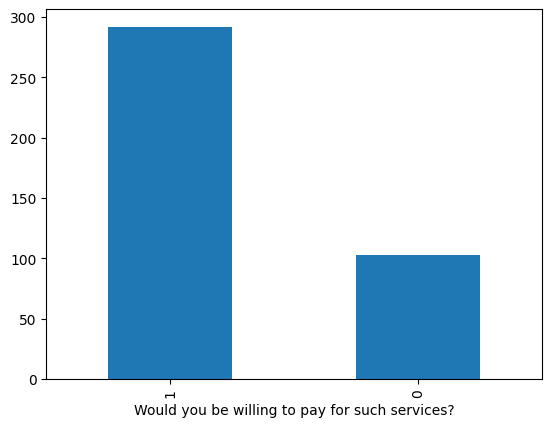

In [34]:
df['Would you be willing to pay for such services?'].value_counts().plot(kind='bar')

<Axes: xlabel='If yes,would you pay GHC 13 a month for such services?'>

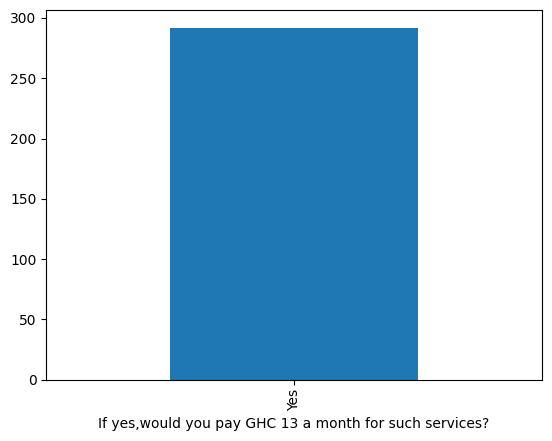

In [35]:
df['If yes,would you pay GHC 13 a month for such services?'].value_counts().plot(kind='bar')

<Axes: xlabel='If no,would you pay GHC 10 a month for such services?'>

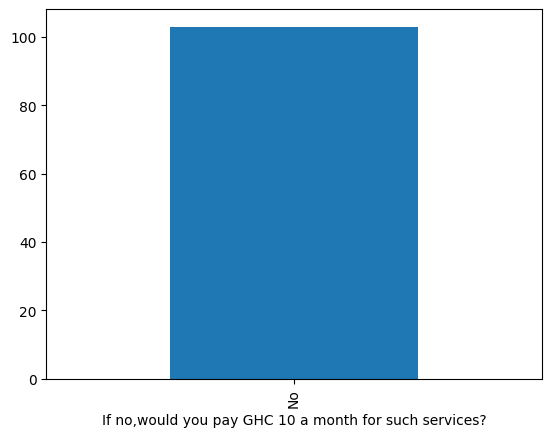

In [36]:
df['If no,would you pay GHC 10 a month for such services?'].value_counts().plot(kind='bar')

<Axes: xlabel='Considering the benefits the services come with, would you pay GHC 15 a month for it?'>

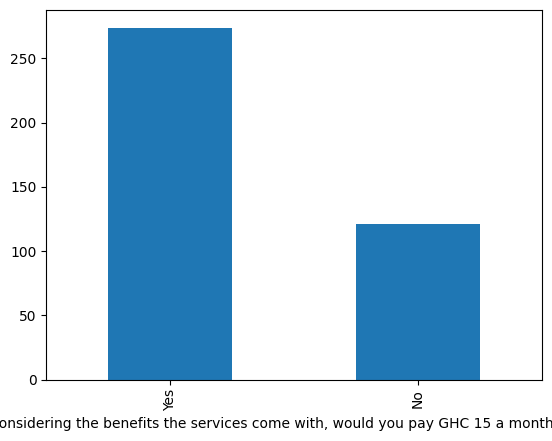

In [37]:
df['Considering the benefits the services come with, would you pay GHC 15 a month for it?'].value_counts().plot(kind='bar')


In [38]:
def get_max_wtp(row):
    if row['Considering the benefits the services come with, would you pay GHC 15 a month for it?'] == 'Yes':
        return 15
    elif row["If yes,would you pay GHC 13 a month for such services?"] == 'Yes':
        return 13
    elif row["If no,would you pay GHC 10 a month for such services?"] == 'Yes':
        return 10
    else:
        return 0  # Not willing to pay any amount

df['max_wtp'] = df.apply(get_max_wtp, axis=1)

In [39]:
df['max_wtp'].head(10)

0    15
1    15
2    13
3    15
4     0
5     0
6     0
7    15
8     0
9    15
Name: max_wtp, dtype: int64

<Axes: xlabel='max_wtp'>

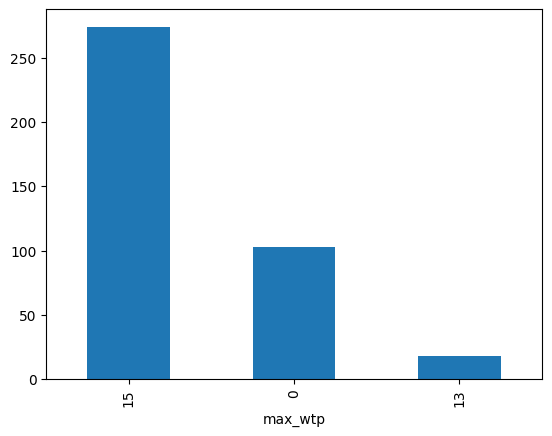

In [40]:
df['max_wtp'].value_counts().plot(kind='bar')

In [41]:
# Prepare your data
new_data = df[['Age', 'household size', 'What is your farm Size in acres?', 'How long have you been in vegetable farming? (years)', 'How much do you earn from farming in a year?','max_wtp']]
new_data = new_data.dropna()
new_df = new_data.copy()

X = new_df[['Age', 'household size', 'What is your farm Size in acres?', 'How long have you been in vegetable farming? (years)', 'How much do you earn from farming in a year?']]
y = new_df['max_wtp'] # target variable
z = new_df[['Age', 'household size', 'What is your farm Size in acres?']]  # Selection variables
X = add_constant(X)

In [42]:
check_missing_data(new_df)

,Missing Values


In [43]:
# Remove rows with infinite or missing values in X
# X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Update y and z accordingly
# y = y[X.index]
# z = z.loc[X.index]

# Run models with updated data
tobit_probit, tobit_ols = tobit_model(X, y)
cragg_probit, cragg_truncreg = cragg_double_hurdle(X, y)
heckman_selection, heckman_outcome = heckman_selection(X, y, z)

# Print results
print("Tobit Model Results:")
print(tobit_probit.summary())
print(tobit_ols.summary())

print("\nCragg's Double Hurdle Model Results:")
print(cragg_probit.summary())
print(cragg_truncreg.summary())

print("\nHeckman Selection Model Results:")
print(heckman_selection.summary())
print(heckman_outcome.summary())

Optimization terminated successfully.
         Current function value: 0.499395
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.499395
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602481
         Iterations 4
Tobit Model Results:
                          Probit Regression Results                           
Dep. Variable:                max_wtp   No. Observations:                  394
Model:                         Probit   Df Residuals:                      388
Method:                           MLE   Df Model:                            5
Date:                Sun, 25 Aug 2024   Pseudo R-squ.:                  0.1308
Time:                        08:24:38   Log-Likelihood:                -196.76
converged:                       True   LL-Null:                       -226.37
Covariance Type:            nonrobust   LLR p-value:                 1.767e-11
                                         

### Recursive Bivariate Probit

In [45]:
from statsmodels.discrete.discrete_model import Probit

def recursive_bivariate_probit(X, y1, y2):
    X = add_constant(X)
    
    # First stage
    model1 = Probit(y1, X).fit()
    
    # Second stage
    X2 = add_constant(np.column_stack((X, y1)))
    model2 = Probit(y2, X2).fit()
    
    return model1, model2

def endogenous_switching_regression(X, y, z):
    X = add_constant(X)
    
    # Selection equation
    selection_model = Probit(z, X).fit()
    
    # Outcome equations
    outcome_model_0 = OLS(y[z == 0], X[z == 0]).fit()
    outcome_model_1 = OLS(y[z == 1], X[z == 1]).fit()
    
    return selection_model, outcome_model_0, outcome_model_1

# Prepare your data
X = new_df[['Age', 'household size', 'How long have you been in vegetable farming? (years)', 'How much do you earn from farming in a year?']]
y = new_df['max_wtp']
farm_size = new_df['What is your farm Size in acres?']
large_farm = (farm_size > farm_size.median()).astype(int)  # Binary indicator for large farms

# Run models
rbp_model1, rbp_model2 = recursive_bivariate_probit(X, large_farm, y > 0)
esr_selection, esr_outcome_0, esr_outcome_1 = endogenous_switching_regression(X, y, large_farm)

# Print results
print("Recursive Bivariate Probit Model Results:")
print("Farm size equation:")
print(rbp_model1.summary())
print("WTP equation:")
print(rbp_model2.summary())

print("\nEndogenous Switching Regression Model Results:")
print("Selection equation:")
print(esr_selection.summary())
print("Outcome model for small farms:")
print(esr_outcome_0.summary())
print("Outcome model for large farms:")
print(esr_outcome_1.summary())

Optimization terminated successfully.
         Current function value: 0.358212
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.511585
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.358212
         Iterations 7
Recursive Bivariate Probit Model Results:
Farm size equation:
                                 Probit Regression Results                                  
Dep. Variable:     What is your farm Size in acres?   No. Observations:                  394
Model:                                       Probit   Df Residuals:                      389
Method:                                         MLE   Df Model:                            4
Date:                              Sun, 25 Aug 2024   Pseudo R-squ.:                  0.1238
Time:                                      08:25:14   Log-Likelihood:                -141.14
converged:                                     True   LL-Null:            

### Ranking with 

<!-- ## Analyze constraints to employing digital technology services
--- -->

<!-- # import numpy as np
# from scipy import stats

# def kendalls_w_diagnostic(rankings):
#     rankings = rankings.to_numpy()
#     n = rankings.shape[0]  # number of raters
#     k = rankings.shape[1]  # number of items being ranked
    
#     print(f"Number of raters (n): {n}")
#     print(f"Number of items (k): {k}")
    
#     # Calculate the sum of ranks for each item
#     rank_sums = np.sum(rankings, axis=0)
#     print(f"Rank sums: {rank_sums}")
    
#     # Calculate the mean of rank sums
#     mean_rank_sum = np.mean(rank_sums)
#     print(f"Mean rank sum: {mean_rank_sum}")
    
#     # Calculate the sum of squared deviations
#     s = np.sum((rank_sums - mean_rank_sum) ** 2)
#     print(f"Sum of squared deviations (S): {s}")
    
#     # Calculate Kendall's W
#     w = (12 * s) / (n ** 2 * (k ** 3 - k))
    
#     # Calculate chi-square statistic
#     chi2 = n * (k - 1) * w
    
#     # Calculate p-value
#     df = k - 1
#     p_value = 1 - stats.chi2.cdf(chi2, df)
    
#     return w, p_value

# # Prepare your data
# constraints = ['Technical complexity', 'Concerns about data privacy and security',
#                'Difficulty in understanding digital content', 'High service cost',
#                'Lack of government support', 'Difficulty in finding services tailored to solve specific problems',
#                'Network/Infrastructural challenges', 'Lack of adequate information about digital technology services and benefits',
#                'Limited trust in digital agricultural service providers',
#                'Limited flexibility in payment plan for digital technology service packages',
#                'Limited after sale support for farmers on the efficient use of digital technology services',
#                'Difficulty in integrating digital technology service data with existing systems']

# rankings = df[constraints]
# rankings.astype(int)

# # Apply diagnostic Kendall's W
# w, p_value = kendalls_w_diagnostic(rankings)
# print(f"Kendall's W: {w}")
# print(f"p-value: {p_value}")

# # Let's also check for any potential issues in the data
# print("\nChecking for potential data issues:")
# print(f"Any negative values: {np.any(rankings < 0)}")
# print(f"Any values greater than 12: {np.any(rankings > 12)}")
# print(f"Any non-integer values: {np.any(rankings % 1 != 0)}")

# # Print the correlation matrix to see if there are any perfect correlations
# correlation_matrix = rankings.corr()
# sns.heatmap(correlation_matrix)
# print("\nCorrelation matrix:")
# # print(correlation_matrix) -->

<!-- # import numpy as np
# from scipy import stats

# def kendalls_w_corrected(rankings):
#     rankings = rankings.to_numpy()
#     n = rankings.shape[0]  # number of raters
#     k = rankings.shape[1]  # number of items being ranked
    
#     # Calculate the sum of ranks for each item
#     rank_sums = np.sum(rankings, axis=0)
    
#     # Calculate the mean of rank sums
#     mean_rank_sum = np.mean(rank_sums)
    
#     # Calculate the sum of squared deviations
#     s = np.sum((rank_sums - mean_rank_sum) ** 2)
    
#     # Calculate Kendall's W
#     w = (12 * s) / (n ** 2 * (k ** 3 - k))
    
#     # Calculate chi-square statistic
#     chi2 = n * (k - 1) * w
    
#     # Calculate p-value
#     df = k - 1
#     p_value = 1 - stats.chi2.cdf(chi2, df)
    
#     return w, p_value

# # Prepare your data
# constraints = ['Technical complexity', 'Concerns about data privacy and security',
#                'Difficulty in understanding digital content', 'High service cost',
#                'Lack of government support', 'Difficulty in finding services tailored to solve specific problems',
#                'Network/Infrastructural challenges', 'Lack of adequate information about digital technology services and benefits',
#                'Limited trust in digital agricultural service providers',
#                'Limited flexibility in payment plan for digital technology service packages',
#                'Limited after sale support for farmers on the efficient use of digital technology services',
#                'Difficulty in integrating digital technology service data with existing systems']

# rankings = df[constraints]

# # Apply corrected Kendall's W
# w, p_value = kendalls_w_corrected(rankings)
# print(f"Corrected Kendall's W: {w}")
# print(f"p-value: {p_value}")



# # And let's look at the first few rows of our rankings
# print("\nFirst few rows of rankings:")
# rankings.head() -->

<!-- #check for missing values in the rankings
check_missing_data(rankings)

# Drop rows with missing values
rankings = rankings.dropna() -->


<!-- # Let's also print some summary statistics of our rankings
print("\nRankings summary:")
rankings.describe() -->

<!-- # import numpy as np
# from scipy import stats

# def kendalls_w_diagnostic(rankings):
#     rankings = rankings.to_numpy()
#     n = rankings.shape[0]  # number of raters
#     k = rankings.shape[1]  # number of items being ranked
    
#     print(f"Number of raters (n): {n}")
#     print(f"Number of items (k): {k}")
    
#     # Calculate the sum of ranks for each item
#     rank_sums = np.sum(rankings, axis=0)
#     print(f"Rank sums: {rank_sums}")
    
#     # Calculate the mean of rank sums
#     mean_rank_sum = np.mean(rank_sums)
#     print(f"Mean rank sum: {mean_rank_sum}")
    
#     # Calculate the sum of squared deviations
#     s = np.sum((rank_sums - mean_rank_sum) ** 2)
#     print(f"Sum of squared deviations (S): {s}")
    
#     # Calculate Kendall's W
#     w = (12 * s) / (n ** 2 * (k ** 3 - k))
    
#     # Calculate chi-square statistic
#     chi2 = n * (k - 1) * w
    
#     # Calculate p-value
#     df = k - 1
#     p_value = 1 - stats.chi2.cdf(chi2, df)
    
#     return w, p_value

# # Prepare your data
# constraints = ['Technical complexity', 'Concerns about data privacy and security',
#                'Difficulty in understanding digital content', 'High service cost',
#                'Lack of government support', 'Difficulty in finding services tailored to solve specific problems',
#                'Network/Infrastructural challenges', 'Lack of adequate information about digital technology services and benefits',
#                'Limited trust in digital agricultural service providers',
#                'Limited flexibility in payment plan for digital technology service packages',
#                'Limited after sale support for farmers on the efficient use of digital technology services',
#                'Difficulty in integrating digital technology service data with existing systems']

# rankings = df[constraints]

# # Apply diagnostic Kendall's W
# w, p_value = kendalls_w_diagnostic(rankings)
# print(f"Kendall's W: {w}")
# print(f"p-value: {p_value}")

# # Let's also check for any potential issues in the data
# print("\nChecking for potential data issues:")
# print(f"Any negative values: {np.any(rankings < 0)}")
# print(f"Any values greater than 12: {np.any(rankings > 12)}")
# print(f"Any non-integer values: {np.any(rankings % 1 != 0)}")

# # Print the correlation matrix to see if there are any perfect correlations
# correlation_matrix = rankings.corr()
# print("\nCorrelation matrix:")
# correlation_matrix -->

<!-- rankings.info() -->

<!-- import pandas as pd
import numpy as np
from scipy import stats

def analyze_constraints(df):
    # Calculate mean scores and rank
    mean_scores = df.mean().sort_values(ascending=True)
    
    print("Mean Scores and Rankings:")
    for item, score in mean_scores.items():
        print(f"{item}: {score:.2f}")
    
    # Friedman test
    chi2, p_value = stats.friedmanchisquare(*[df[col] for col in df.columns])
    
    print("\nFriedman Test Results:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    return mean_scores

# Assuming 'rankings' is your DataFrame with the constraint columns
mean_scores = analyze_constraints(rankings)

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
mean_scores.plot(kind='barh')
plt.title('Constraints Ranked by Mean Score')
plt.xlabel('Mean Score (lower is more severe)')
plt.tight_layout()
plt.show() -->

<!-- # import pandas as pd
# import numpy as np
# from statsmodels.discrete.discrete_model import Probit
# from statsmodels.regression.linear_model import OLS
# from tobit_reg import Tobit
# import statsmodels.api as sm
# # from tobit_reg import Tobit
# # %pip install tobit-reg
# # from tobit import *

# def get_consolidated_wtp(row):
#     if row['Considering the benefits the services come with, would you pay GHC 15 a month for it?'] == 'Yes':
#         return 15
#     elif pd.notna(row["If yes,would you pay GHC 13 a month for such services?"]) and row["If yes,would you pay GHC 13 a month for such services?"] == 'Yes':
#         return 13
#     elif pd.notna(row["If no,would you pay GHC 10 a month for such services?"]) and row["If no,would you pay GHC 10 a month for such services?"] == 'Yes':
#         return 10
#     elif row['Would you be willing to pay for such services?'] == 'Yes':
#         return 1  # Willing to pay, but amount is unknown
#     else:
#         return 0  # Not willing to pay

# # Create consolidated WTP variable
# df['consolidated_wtp'] = df.apply(get_consolidated_wtp, axis=1)

# # Prepare your data
# X = df[['Age', 'household size', 'What is your farm Size in acres?', 'How long have you been in vegetable farming? (years)', 'How much do you earn from farming in a year?']]
# y = df['consolidated_wtp']

# # Handle missing values in X
# X = X.dropna()
# y = y[X.index]

# # Add constant term to X for statsmodels
# X = sm.add_constant(X)

# # Print summary of WTP
# print("Summary of Willingness to Pay:")
# print(y.value_counts(normalize=True))

# # Tobit model
# tobit_model = Tobit(y, X, left=0, right=15).fit()

# # Cragg's Double Hurdle model
# participation = (y > 0).astype(int)
# probit_model = sm.Probit(participation, X).fit()
# truncated_reg = sm.Tobit(y[y > 0], X[y > 0], left=0, right=15).fit()

# # Heckman selection model
# selection = (y > 0).astype(int)
# selection_model = sm.Probit(selection, X).fit()
# inverse_mills_ratio = selection_model.predict(X) / (1 - selection_model.predict(X))
# X_with_mills = sm.add_constant(np.column_stack((X, inverse_mills_ratio)))
# outcome_model = sm.OLS(y[y > 0], X_with_mills[y > 0]).fit()

# # Print results
# print("\nTobit Model Results:")
# print(tobit_model.summary())

# print("\nCragg's Double Hurdle Model Results:")
# print("Participation equation:")
# print(probit_model.summary())
# print("Amount equation:")
# print(truncated_reg.summary())

# print("\nHeckman Selection Model Results:")
# print("Selection equation:")
# print(selection_model.summary())
# print("Outcome equation:")
# print(outcome_model.summary()) -->